In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.graph_objects as pg
import plotly.express as px

In [2]:
def toss_coin(number_of_tosses=100):
    return pd.Series(np.random.choice(['Heads','Tails'],number_of_tosses))

def throw_dice(number_of_tosses=100):
    return pd.Series(np.random.randint(1,6+1,number_of_tosses))

def pick_card(number_of_tosses=100):
    return pd.Series(np.random.randint(1,13+1,number_of_tosses))

In [20]:
# Probability
results = toss_coin()
print(results.value_counts())
fig = pg.Figure([pg.Bar(x=results.value_counts().keys(),y=results.value_counts().values)])
fig.show()

Tails    51
Heads    49
Name: count, dtype: int64


In [21]:
results = throw_dice()
print(results.value_counts())
fig = pg.Figure([pg.Bar(x=results.value_counts().keys(),
                        y=results.value_counts().values)])
fig.show()

6    20
4    18
5    17
3    17
1    14
2    14
Name: count, dtype: int64


In [22]:
results = pick_card()
print(results.value_counts())
fig = pg.Figure([pg.Bar(x=results.value_counts().keys(),
                        y=results.value_counts().values)])
fig.show()

6     10
2      9
3      9
5      9
8      8
13     8
9      8
1      7
7      7
11     7
4      6
12     6
10     6
Name: count, dtype: int64


In [23]:
# Derived Probability (Bernouli's distribution)
results = pd.Series([np.sum(toss_coin(20) == 'Heads') for _ in range(1000)])
fig = pg.Figure([pg.Bar(x=results.value_counts().keys(),
                        y=results.value_counts().values)])
fig.show()

In [24]:
results = pd.Series([np.sum(toss_coin(20) == 'Tails') for _ in range(1000)])
fig = pg.Figure([pg.Bar(x=results.value_counts().keys(),
                        y=results.value_counts().values)])
fig.show()

In [25]:
results = pd.Series([np.sum(throw_dice(20) == 4) for _ in range(1000)])
fig = pg.Figure([pg.Bar(x=results.value_counts().keys(),
                        y=results.value_counts().values)])
fig.show()

In [26]:
results = {shots: throw_dice(shots) for shots in [10, 100, 1000, 10000, 1000000]}
fig = pg.Figure([pg.Bar(x=result.value_counts().keys(),
                        y=result.value_counts().values / shots,)
                    for shots, result in results.items()])
fig.add_shape(type='line', x0=0.5, y0=1/6, x1=6.5, y1=1/6, line=dict(color='Red',))
fig.show()

In [27]:
results = {shots: toss_coin(shots) for shots in [10, 100, 1000, 10000, 1000000]}
fig = pg.Figure([pg.Bar(x=result.value_counts().keys(),
                        y=result.value_counts().values / shots,)
                    for shots, result in results.items()])
fig.add_shape(type='line', x0=0.5, y0=1/6, x1=6.5, y1=1/6, line=dict(color='Red',))
fig.show()

In [28]:
results = {shots: pick_card(shots) for shots in [10, 100, 1000, 10000, 1000000]}
fig = pg.Figure([pg.Bar(x=result.value_counts().keys(),
                        y=result.value_counts().values / shots,)
                    for shots, result in results.items()])
fig.add_shape(type='line', x0=0.5, y0=1/6, x1=6.5, y1=1/6, line=dict(color='Red',))
fig.show()

In [29]:
# the probability that if you draw a card at random it will be a numbered card.
from fractions import Fraction
total_cards = 52
numbered_cards_per_suit = 9  # 2, 3, 4, 5, 6, 7, 8, 9, 10
total_numbered_cards = numbered_cards_per_suit * 4
probability = Fraction(total_numbered_cards, total_cards)
print("The probability that a randomly drawn card is a numbered card (2 to 10) is:", probability)

The probability that a randomly drawn card is a numbered card (2 to 10) is: 9/13


In [30]:
# the probability that if you draw a card again at random it will be both numbered cards. (with replacement)
from fractions import Fraction
total_cards = 52
numbered_cards_per_suit = 9  # 2, 3, 4, 5, 6, 7, 8, 9, 10
total_numbered_cards = numbered_cards_per_suit * 4
single_draw_probability = Fraction(total_numbered_cards, total_cards)
combined_probability = single_draw_probability ** 2
print("The probability that both cards drawn are numbered cards is:", combined_probability)

The probability that both cards drawn are numbered cards is: 81/169


In [31]:
# the probability that if you draw a card again at random it will be both numbered cards. (without replacement)
from fractions import Fraction
total_cards = 52
total_numbered_cards = 9 * 4  # 9 numbered cards per suit, 4 suits
first_draw_probability = Fraction(total_numbered_cards, total_cards)
second_draw_probability = Fraction(total_numbered_cards - 1, total_cards - 1)
combined_probability = first_draw_probability * second_draw_probability
print("The probability that both cards drawn are numbered cards is:", combined_probability)

The probability that both cards drawn are numbered cards is: 105/221


In [32]:
# probability that the bottom card of your cut is an numbered cards card.
from fractions import Fraction
total_cut_positions = 51
favorable_positions = 36
probability = Fraction(favorable_positions, total_cut_positions)
print("The probability that the bottom card of your cut is a numbered card is:", probability)

The probability that the bottom card of your cut is a numbered card is: 12/17


In [37]:
# You have a suffled deck of 52 cards, 4 of which are aces. You are to draw cards one by one and throw them out. As soon as you see an ace you stop. How many non-ace cards did you throw out?
import random
def simulate_draw_until_ace(num_simulations=1000):
    total_non_aces = 0
    for _ in range(num_simulations):
        deck = ['A'] * 4 + ['non-A'] * 48
        random.shuffle(deck)
        non_ace_count = 0
        for card in deck:
            if card == 'A':
                break
            non_ace_count += 1
        total_non_aces += non_ace_count
    average_non_aces = total_non_aces / num_simulations
    return average_non_aces

average_non_aces = simulate_draw_until_ace(num_simulations)
print("Average number of non-ace cards drawn before the first ace:", average_non_aces)

Average number of non-ace cards drawn before the first ace: 9.58578


In [38]:
# given solution
def number_of_numbered_cards_drawn_before_ace(trials=100, show_trials=10):
    values = ['A', '2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K']
    ranks = ['H', 'D', 'C', 'S']

    cards_thrown_counts = []
    for experiment in range(trials):
        deck_of_cards = [value + rank for value in values for rank in ranks]
        cards_thrown = 0
        cards_pile = []
        while len(deck_of_cards) > 0:
            picked_card = np.random.choice(deck_of_cards)
            cards_pile.append(picked_card)
            if picked_card[0] == 'A':
                break
            cards_thrown += 1
            deck_of_cards.remove(picked_card)
        if experiment < show_trials:
            print(cards_thrown, 'cards were thrown:', ' '.join(cards_pile))
        cards_thrown_counts.append(cards_thrown)

    return np.mean(cards_thrown_counts), cards_thrown_counts

expected_cards_thrown, cards_thrown_counts = number_of_numbered_cards_drawn_before_ace(10000)
print(f'\n{expected_cards_thrown} cards are tossed before we see the first ace!')

19 cards were thrown: 7H 2D 8S 7D JC 8D QS 2S 4H KD 5C 10S JD 4S 6S 3D 2C 4C KH AH
13 cards were thrown: 4H 7D JC 5D 3D 3H 6D 10S 8D 2C 4D 8S 4C AS
0 cards were thrown: AS
5 cards were thrown: 7S 2H QH 10C KS AH
5 cards were thrown: 3S JD 4H 5D KH AD
5 cards were thrown: 6D 8H 10D 3H 7C AC
1 cards were thrown: 4C AH
3 cards were thrown: JH QS 10H AS
13 cards were thrown: JC 8D 4H 7H JS QS KD JD 5C 6D 9D QC 4S AD
20 cards were thrown: 10H 6H 8H 6D 5C 8D 2S 2C 3C 5H 10D 4D 8S 7S 3D JH KH JS 9S QS AC

9.5639 cards are tossed before we see the first ace!


In [39]:
results = pd.Series(cards_thrown_counts)
fig = pg.Figure([pg.Bar(x=results.value_counts().keys(),
                        y=results.value_counts().values)])
fig.show()

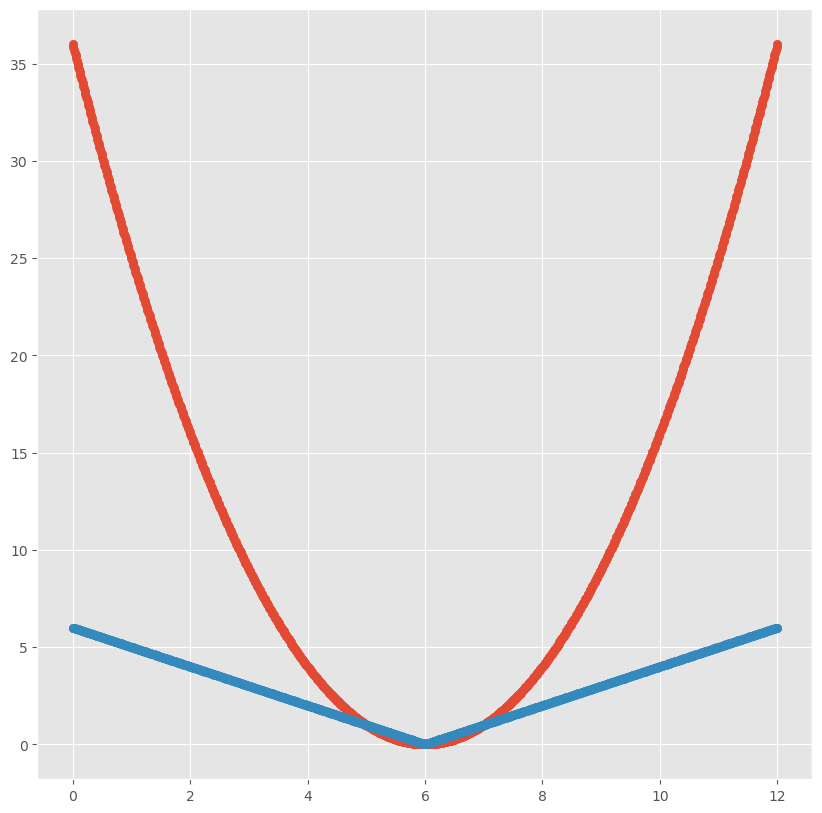

In [47]:
# Measurements and errors (using mean square error)
#from matplotlib import pyplot as plt
plt.style.use('ggplot')
plt.figure(figsize=(10, 10))

measurements = np.linspace(0, 12, 1000)
plt.scatter(measurements, (measurements - 6) ** 2, label='Squared Error')
plt.scatter(measurements, abs(measurements - 6), label='Absolute Error')
plt.show()

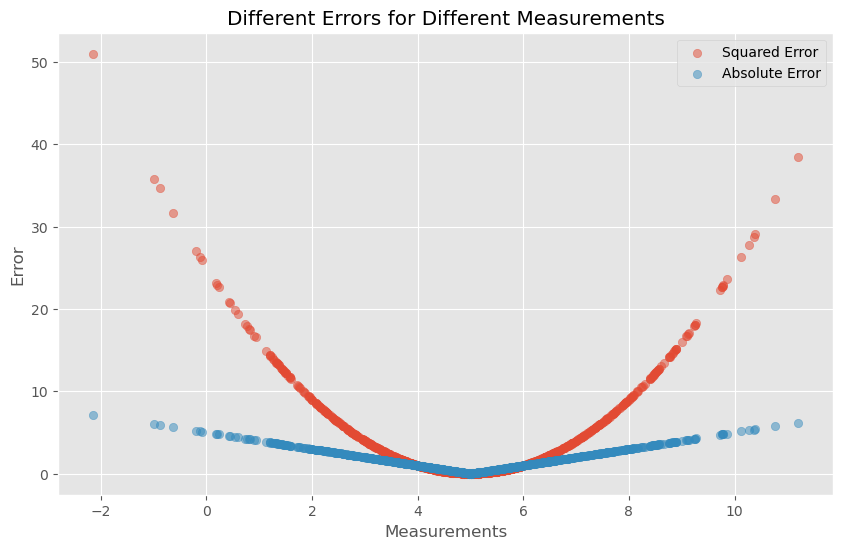

In [48]:
# import numpy as np
# import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.figure(figsize=(10, 6))
measurements = np.random.normal(loc=5, scale=2, size=1000)
squared_errors = (measurements - 5) ** 2
plt.scatter(measurements, squared_errors, label='Squared Error', alpha=0.5)
absolute_errors = np.abs(measurements - 5)
plt.scatter(measurements, absolute_errors, label='Absolute Error', alpha=0.5)
plt.xlabel('Measurements')
plt.ylabel('Error')
plt.title('Different Errors for Different Measurements')
plt.legend()
plt.show()

In [51]:
# import pandas as pd
grades = pd.read_csv("https://archive.org/download/ml-fundamentals-data/machine-learning-fundamentals-data/grades.csv")
print(grades.shape)
numeric_columns = grades.select_dtypes(include=['number'])
agg_stats = numeric_columns.agg(["mean", "var", "std"])
print(agg_stats)

(26, 4)
         Physics     Biology       Maths
mean   63.769231   67.038462   69.769231
var   517.224615  456.758462  300.664615
std    22.742573   21.371908   17.339683


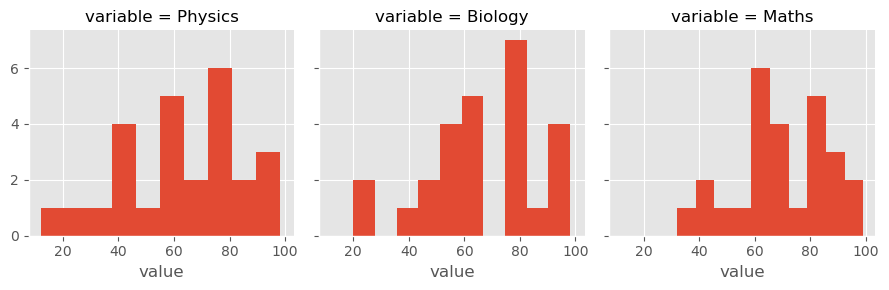

In [50]:
import warnings
# import seaborn as sns
# import matplotlib.pyplot as plt
warnings.filterwarnings("ignore", message="The figure layout has changed to tight")
g = sns.FacetGrid(grades.melt("Name"), col="variable")
g.map(plt.hist, "value")

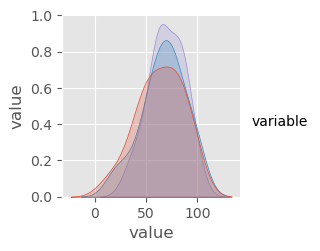

In [53]:
sns.pairplot(grades.melt("Name"), hue="variable", diag_kind="kde", height=2.5)
plt.show()

In [54]:
grades["Physics_std"] = (grades["Physics"] - grades["Physics"].mean()) / grades["Physics"].std()

In [55]:
grades.head()

,Name,Physics,Biology,Maths,Physics_std
0,Arnold,80,78,70,0.713673
1,Bob,60,98,45,-0.165735
2,Cassandra,34,56,65,-1.308965
3,Donovan,56,65,32,-0.341616
4,Emily,98,23,55,1.505141


In [56]:
# standardisation allows us to compare the results from different exams
grades["Maths_std"] = (grades["Maths"] - grades["Maths"].mean()) / grades["Maths"].std()
grades.head()

,Name,Physics,Biology,Maths,Physics_std,Maths_std
0,Arnold,80,78,70,0.713673,0.013309
1,Bob,60,98,45,-0.165735,-1.428471
2,Cassandra,34,56,65,-1.308965,-0.275047
3,Donovan,56,65,32,-0.341616,-2.178196
4,Emily,98,23,55,1.505141,-0.851759


In [57]:
# Bayes theorem
# Sensitivity: P(Positive test_result | Disease present)
sensitivity = 0.99
# Specificity: P(Negative test_result | Disease absent)
specificity = 0.95
# Prevalence of disease: P(Disease present)
prevalence = 0.001
# Probability of a positive test & disease is present: P(Positive test result and Disease present)
p_positive_given_disease = sensitivity
# Probability of a positive test & disease is absent: P(Positive test result and Disease absent)
p_positive_given_no_disease = 1 - specificity
p_disease_given_positive = (p_positive_given_disease * prevalence) / ((p_positive_given_disease * prevalence) + (p_positive_given_no_disease * (1 - prevalence)))
print("Probability of having the disease given a positive test result:", p_disease_given_positive)

Probability of having the disease given a positive test result: 0.019434628975265003


In [60]:
# Binomial distribution
from scipy.stats import binom
binom.pmf(k=5, n=5, p=0.25)

0.0009765625

In [61]:
1 - binom.pmf(k=4, n=5, p=0.75) - binom.pmf(k=5, n=5, p=0.75)

0.3671875

In [62]:
binom.cdf(3, n=5, p=0.75)

0.3671875

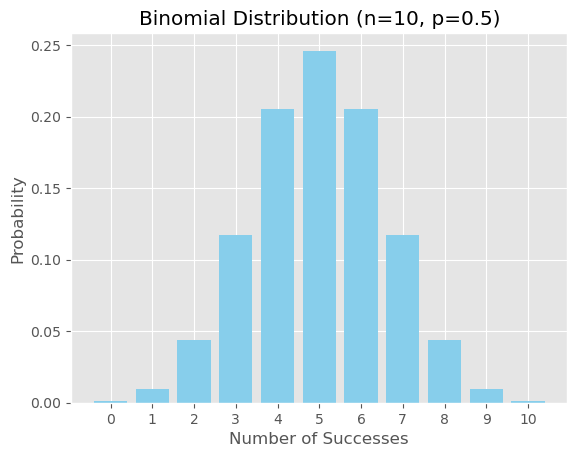

In [63]:
import numpy as np
import matplotlib.pyplot as plt
n = 10  # no of trials
p = 0.5  # P(success)
x = np.arange(0, n+1) #(number of success)
pmf = np.array([np.math.comb(n, k) * (p ** k) * ((1 - p) ** (n - k)) for k in x]) #pmf of binomial theorem
plt.bar(x, pmf, color='skyblue') #plot the pmf
plt.title('Binomial Distribution (n={}, p={})'.format(n, p))
plt.xlabel('Number of Successes')
plt.ylabel('Probability')
plt.xticks(x)
plt.grid(True)
plt.show()

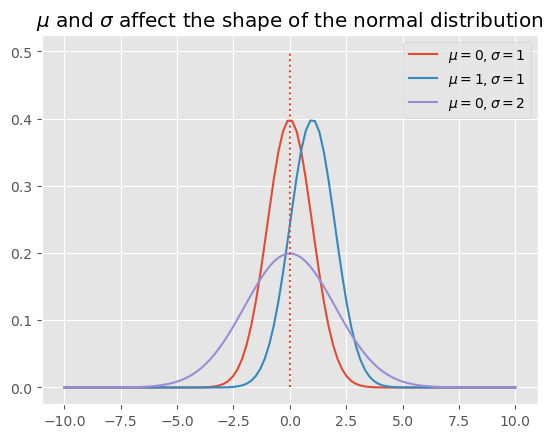

In [64]:
# normal distribution
from scipy.stats import norm
x = np.linspace(-10, 10, 100)
f1 = norm.pdf(x, loc=0, scale=1)
f2 = norm.pdf(x, loc=1, scale=1)
f3 = norm.pdf(x, loc=0, scale=2)

plt.plot(x, f1, label="$\mu=0, \sigma=1$")
plt.plot(x, f2, label="$\mu=1, \sigma=1$")
plt.plot(x, f3, label="$\mu=0, \sigma=2$")
plt.vlines(x=0, ymin=0, ymax=0.5, linestyles="dotted")

plt.legend()
plt.title("$\mu$ and $\sigma$ affect the shape of the normal distribution")
plt.show()

In [65]:
print(norm.cdf(0)) #cumulative density function
print(norm.ppf(0.5)) #percent point function

0.5
0.0


In [72]:
norm.ppf(0.84, loc=1694.5732, scale=732.5712)

2423.0844048524286

In [73]:
1694.5732 + 732.5712

2427.1444

In [74]:
norm.ppf(0.97523, loc=1694.5732, scale=732.5712)

3133.2804526279883

In [75]:
1694.5732 + 2 * 732.5712

3159.7156

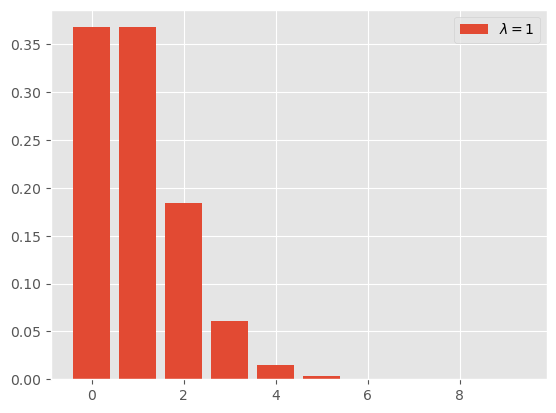

In [90]:
# Poisson distribution
from scipy.stats import poisson
x = np.arange(10)
f1 = poisson.pmf(x, mu=1)
f2 = poisson.pmf(x, mu=2)
f3 = poisson.pmf(x, mu=3)

plt.bar(x, f1, label="$\lambda=1$")
plt.legend()

In [91]:
x @ f1

0.999998874797402

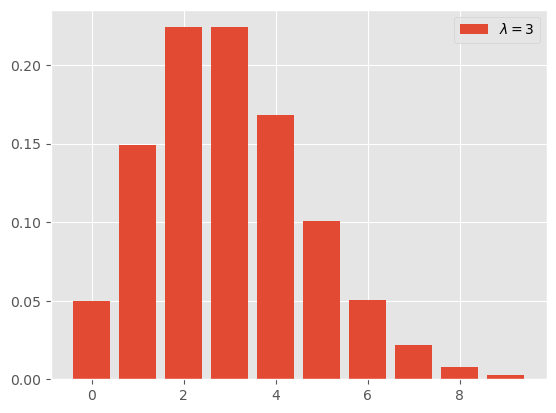

In [92]:
plt.bar(x, f3, label="$\lambda=3$")
plt.legend()

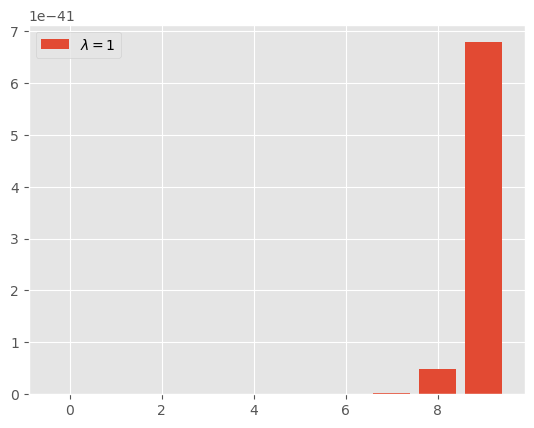

In [94]:
x = np.arange(10)
f1 = poisson.pmf(x, mu=123)
f2 = poisson.pmf(x, mu=234)
f3 = poisson.pmf(x, mu=345)

plt.bar(x, f1, label="$\lambda=1$")
plt.legend()

In [95]:
x @ f1

6.52159149660219e-40

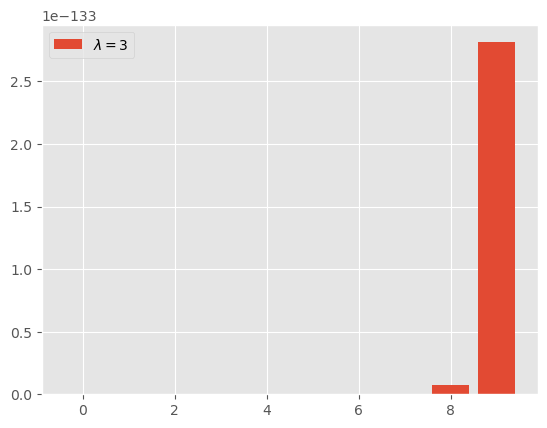

In [96]:
plt.bar(x, f3, label="$\lambda=3$")
plt.legend()

In [97]:
poisson.pmf(3, 5)

0.1403738958142805

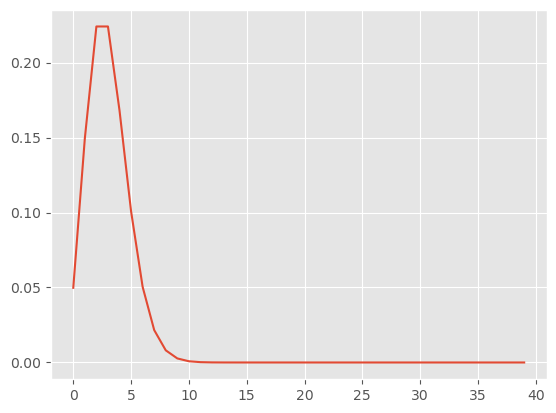

In [98]:
# central limit theorem
from scipy.stats import poisson
bins = np.arange(0, 40)
p_pois = poisson.pmf(bins, mu=3)
plt.plot(bins, p_pois)

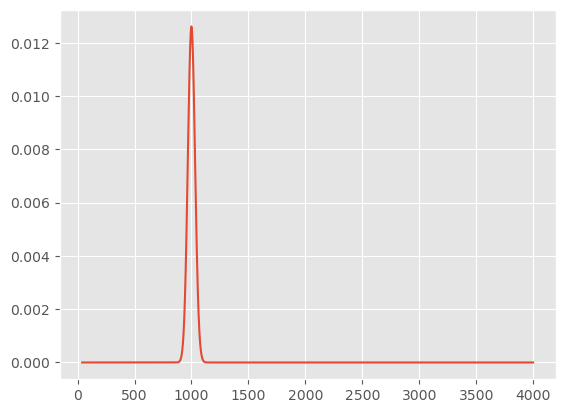

In [106]:
bins = np.arange(40, 4000)
p_pois = poisson.pmf(bins, mu=1000)
plt.plot(bins, p_pois)

(array([ 9., 24., 49., 79., 71., 68., 42., 30., 18., 10.]),
 array([2.1, 2.3, 2.5, 2.7, 2.9, 3.1, 3.3, 3.5, 3.7, 3.9, 4.1]),
 <BarContainer object of 10 artists>)

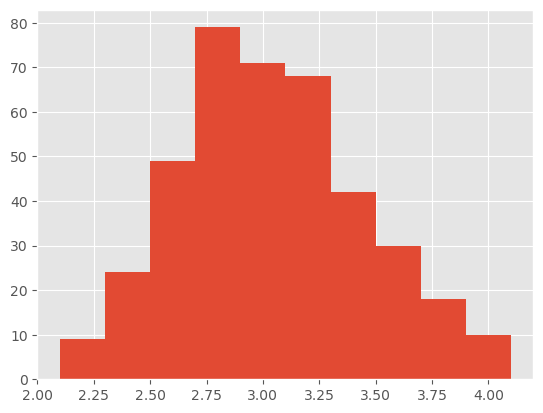

In [107]:
def sample_pois(_):
    samples = poisson.rvs(mu=3, size=20)
    return np.mean(samples)

means = list(map(sample_pois, np.arange(400)))
plt.hist(means)


(array([ 15.,  66., 267., 662., 957., 980., 673., 269.,  95.,  16.]),
 array([48.295, 48.633, 48.971, 49.309, 49.647, 49.985, 50.323, 50.661,
        50.999, 51.337, 51.675]),
 <BarContainer object of 10 artists>)

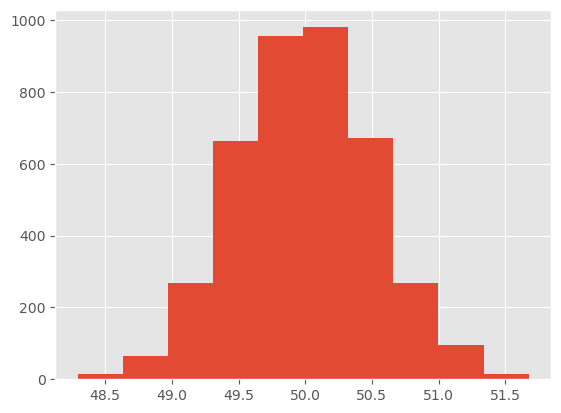

In [108]:
def sample_pois(_):
    samples = poisson.rvs(mu=50, size=200)
    return np.mean(samples)

means = list(map(sample_pois, np.arange(4000)))
plt.hist(means)

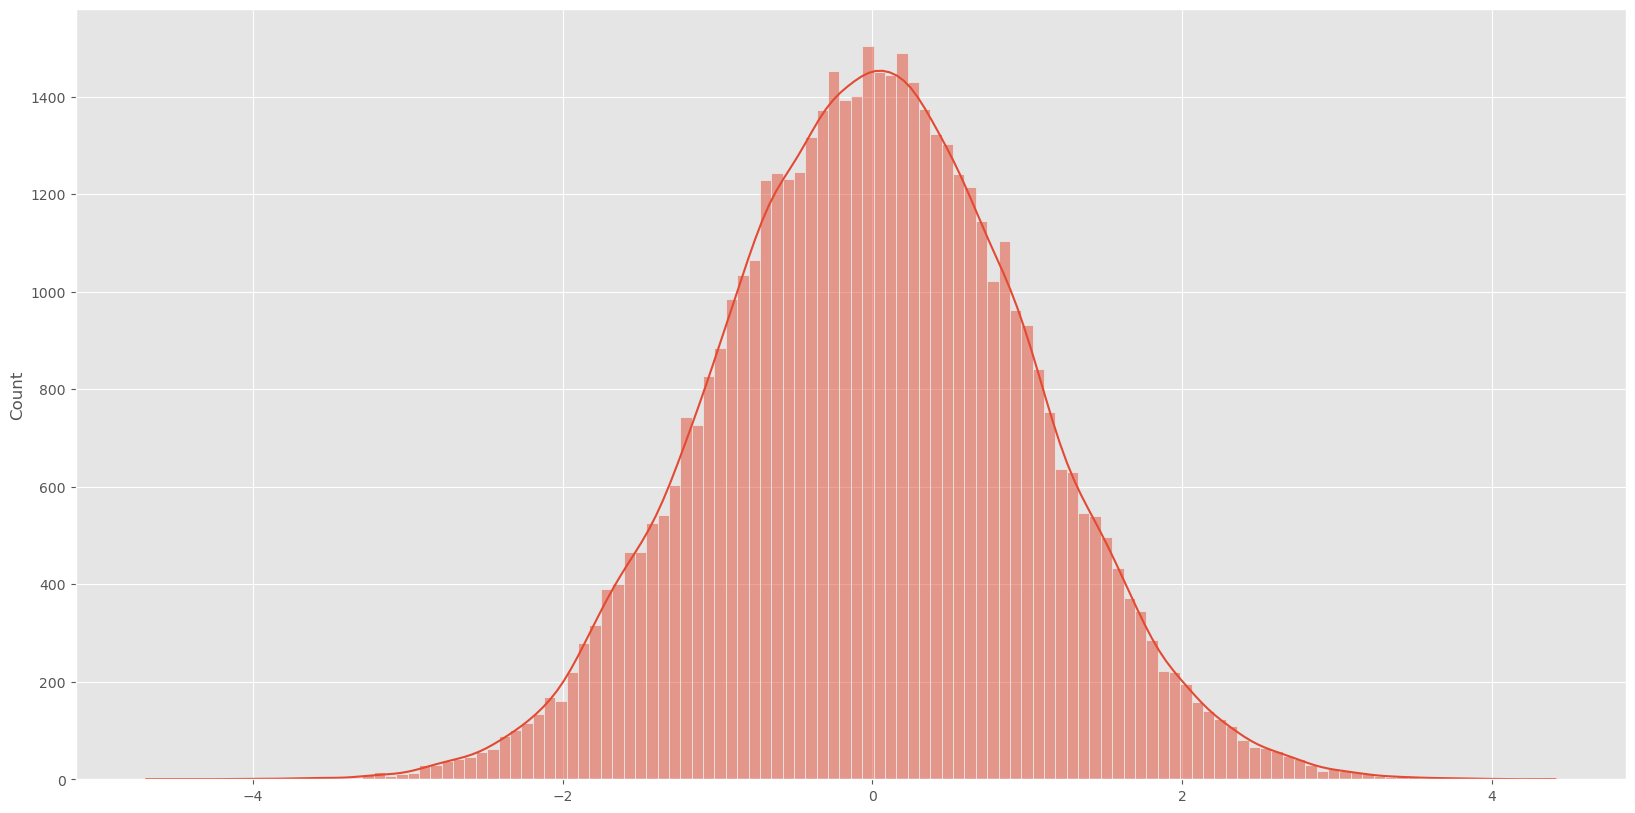

In [109]:
# Using normal distribution in weight initialization
import seaborn as sns
plt.figure(figsize=(20, 10))
x = np.random.normal(size=(50000))
sns.histplot(x, kde=True)
plt.show()

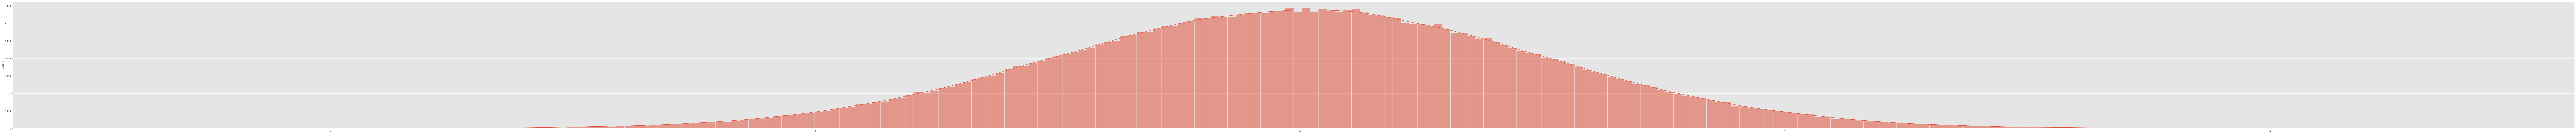

In [113]:
import seaborn as sns
plt.figure(figsize=(200, 10))
x = np.random.normal(size=(500000))
sns.histplot(x, kde=True)
plt.show()

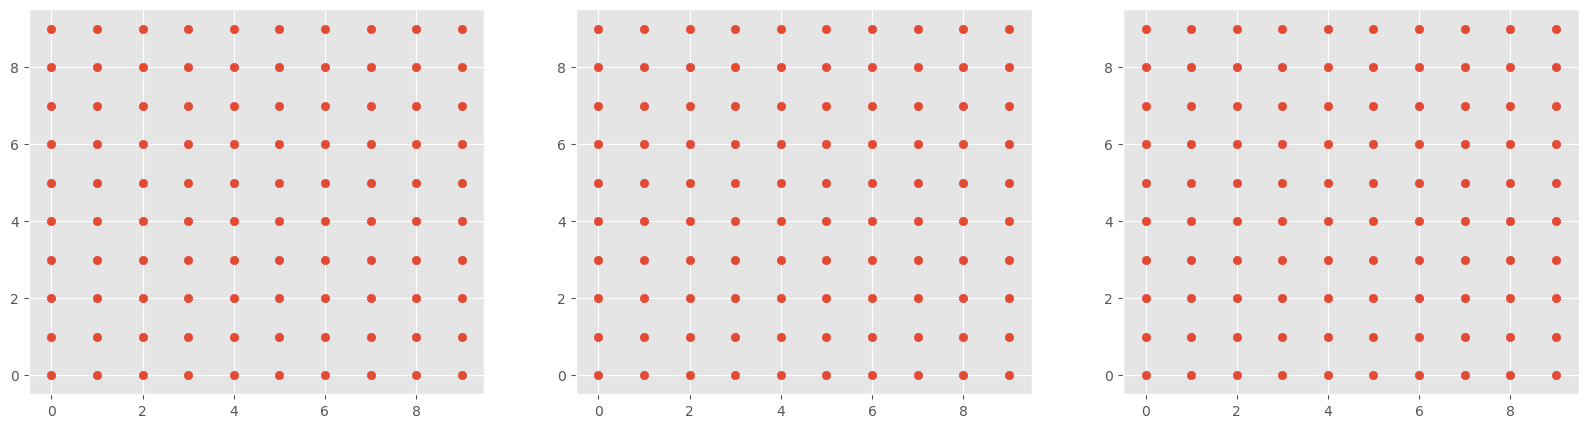

In [114]:
# entropy
fix, axs = plt.subplots(1, 3, figsize=(20, 5))

for ax in axs:
    x, y = np.meshgrid(np.arange(10), np.arange(10))
    ax.scatter(x.ravel(), y.ravel())
    ax.set_xlim(-0.5, 9.5)
    ax.set_ylim(-0.5, 9.5)

plt.show()

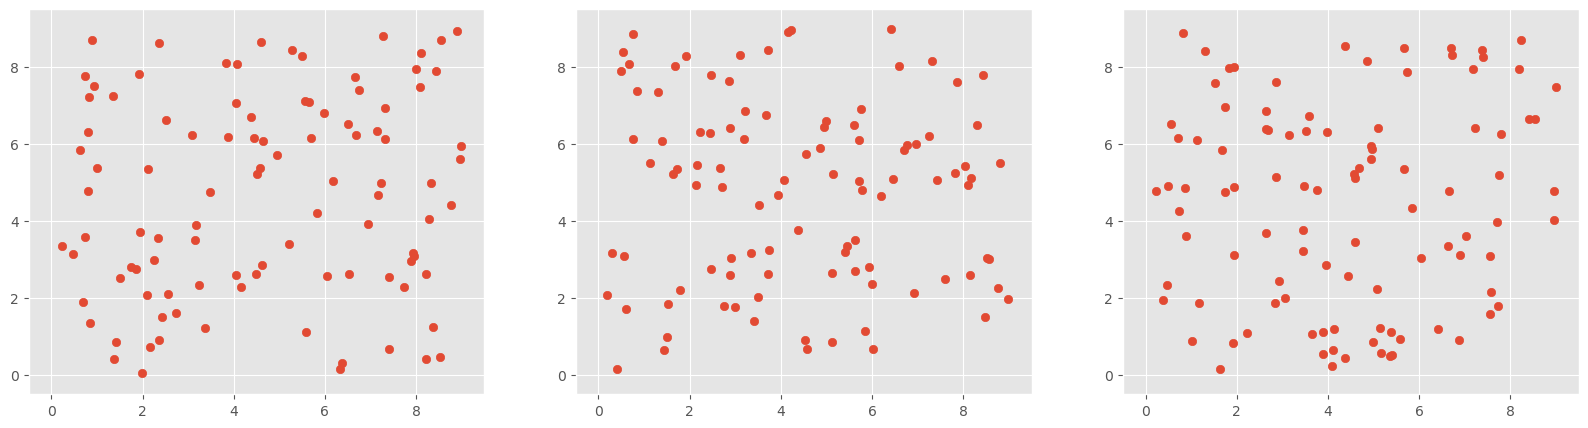

In [116]:
fix, axs = plt.subplots(1, 3, figsize=(20, 5))

for ax in axs:
    x, y = np.random.random(100) * 9, np.random.random(100) * 9
    ax.scatter(x.ravel(), y.ravel())
    ax.set_xlim(-0.5, 9.5)
    ax.set_ylim(-0.5, 9.5)

plt.show()

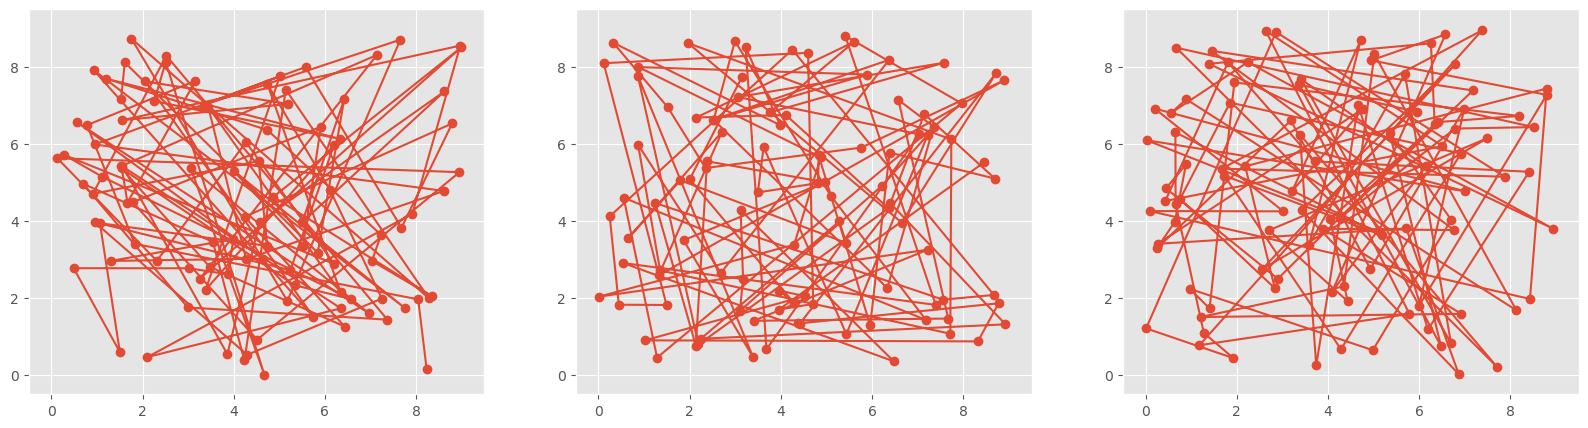

In [117]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5))
for ax in axs:
    x, y = np.random.random(100) * 9, np.random.random(100) * 9
    ax.plot(x, y, 'o-')  # 'o-' specifies circles connected by lines
    ax.set_xlim(-0.5, 9.5)
    ax.set_ylim(-0.5, 9.5)

plt.show()

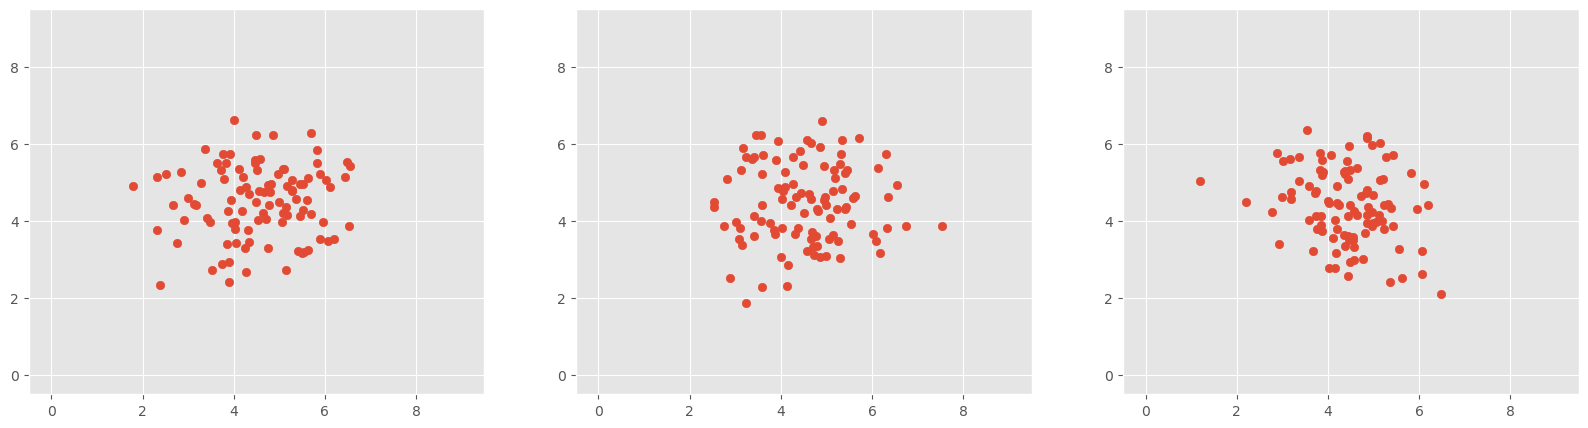

In [118]:
fix, axs = plt.subplots(1, 3, figsize=(20, 5))

for ax in axs:
    x, y = np.random.normal(loc=4.5, scale=1.0, size=100), np.random.normal(loc=4.5, scale=1.0, size=100)
    ax.scatter(x.ravel(), y.ravel())
    ax.set_xlim(-0.5, 9.5)
    ax.set_ylim(-0.5, 9.5)

plt.show()